# Mini Project 3

Problem Statement

Customer Analysis is a detailed analysis of a company’s customers. It helps a business to
better understand its customers and makes it easier for them to modify products according
to the specific needs, behaviours and concerns of different types of customers. Customer
analysis helps a business to modify its product based on its target customers from different
types of customer segments. For example, instead of spending money to market a new
product to every customer in the company’s database, a company can analyze which
customer segment is most likely to buy the product and then market the product only on that
particular segment.

# Data Dictionary

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

# Perform clustering to summarize customer segments.

# Importing Liberaries for Data Processing

In [1]:
import numpy as np
import pandas as pd

# Importing Data Visualization Liberies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [3]:
# preprocessing
from sklearn.preprocessing import StandardScaler

# Importing PCA

In [4]:
# pca
from sklearn.decomposition import PCA

# Importing Unsupervised Machine Learning Liberaries

In [5]:
# clustering
from apyori import apriori
from sklearn.cluster import KMeans, AgglomerativeClustering

# Importing CM For Evaluating

In [6]:
# evaluations
from sklearn.metrics import confusion_matrix

# Importing Clusturing Liberaries

In [7]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# Loading the Data

In [9]:
df=pd.read_csv("customer_data.csv")

# Exploratory Data Analysis (EDA)

In [10]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    04/09/12       58       635  ...                  7             0   
1    08/03/14       38        11  ...                  5             0   
2    21/08/13       26       426  ...                  4             0   
3    10/02/14       26        11  ...                  6             0   
4    19/01/14       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [11]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1    13/06/13       46       709  ...                  5   
2236         1    10/06/14       56       406  ...                  7   
2237         0    25/01/14       91       908  ...                  6   
2238         1    24/01/14        8       428  ...                  3   
2239         1    15/10/12       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
df.shape

(2240, 29)

In [14]:
df.size

64960

## Treating Missing Values

In [15]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:>

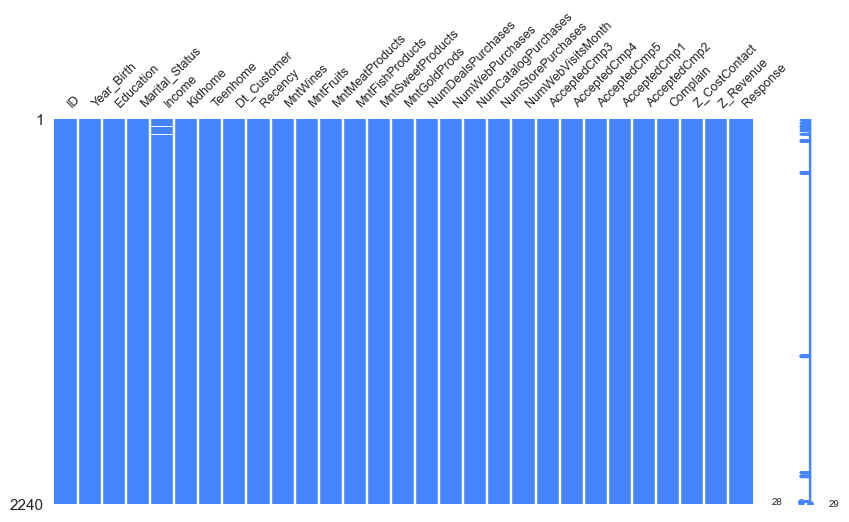

In [16]:
import missingno as msno # it will provides a small toolset of flexible and easy-to-use missing data visualizations

msno.matrix(df, figsize=(10,5), fontsize=9,color=(0.27, 0.52, 1.0))

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Feature Engineering

In [19]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean         37.637635  ...           5.319043      0.073556      0.074007   
std          54.752082  ...           2.425359      0.261106      0.261842   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [21]:
# dt Customer is showing here is object where as these are date; 

In [22]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [23]:
print("The Newest customer's entry date in the records : ", max(df['Dt_Customer']))
print("The Oldest customer's entry date in the records : ", min(df['Dt_Customer']))

The Newest customer's entry date in the records :  2014-12-06 00:00:00
The Oldest customer's entry date in the records :  2012-01-08 00:00:00


Finding Out "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [24]:
df['Age'] = 2015 - df['Year_Birth']

Create another feature "Spent" signifies the total amount spent by the customer in various categories over the time of two years.

In [25]:
df['Total Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [26]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [27]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})  

Create a feature "Children" to indicate total children in a household i.e, kids and teenagers.

In [28]:
df["Kidhome"].value_counts()

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

In [29]:
df["Teenhome"].value_counts()

0    1147
1    1018
2      51
Name: Teenhome, dtype: int64

In [30]:
df['Children'] = df['Kidhome'] + df['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

In [31]:
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2}) + df['Children']

Create a feature "Is_Parent" to indicate parenthood status

In [32]:
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

Segregating education levels in three groups

In [33]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [34]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

Checking Our New DataFrame

In [35]:
df.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate       Together  71613.0        0         0   
3  6182        1984      Graduate       Together  26646.0        1         0   
4  5324        1981  Postgraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-04-09       58       635  ...         0              3         11   
1  2014-08-03       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-10-02       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  Age  Total Spent  Living_With  Children  Family_Size  Is_Parent  
0         1   58         1617        Alone         0            1          0  
1         0   61           27        Alone         2            3          1  
2         0   50          776      Partner         0            2          0  
3         0   31           53      Partner         1            3          1  
4         0   34          422      Partner         1            3          1  

[5 rows x 35 columns]

Dropping some of the Unused Features

In [36]:
getout = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(getout, axis=1)

Checking Our New DataFrame

In [37]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Response  Age  Total Spent  Living_With  Children  \
0             0         0         1   58         1617        Alone         0   
1             0         0         0   61           27        Alone         2   
2             0         0         0   50          776      Partner         0   
3             0         0         0   31           53      Partner         1   
4             0         0         0   34          422      Partner         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1  

[5 rows x 29 columns]

# Data Visualization And Data Analysis

In [38]:
df.shape

(2216, 29)

In [39]:
df.size

64264

In [40]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean      43.965253  ...      0.073105      0.064079      0.013538   
std       51.815414  ...      0.260367      0.244950      0.115588   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        9.000000  ...      0.000000      0.000000      0.000000   
50%       24.500000  ...      0.000000      0.000000      0.000000   
75%       56.000000  ...      0.000000      0.000000      0.000000   
max      321.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response          Age  Total Spent     Children  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.009477     0.150271    46.179603   607.075361     0.947202   
std       0.096907     0.357417    11.985554   602.900476     0.749062   
min       0.000000     0.000000    19.000000     5.000000     0.000000   
25%       0.000000     0.000000    38.000000    69.000000     0.000000   
50%       0.000000     0.000000    45.000000   396.500000     1.000000   
75%       0.000000     0.000000    56.000000  1048.000000     1.000000   
max       1.000000     1.000000   122.000000  2525.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 27 columns]

In [41]:
df.describe(include=object).T

count unique       top  freq
Education    2216      3  Graduate  1116
Living_With  2216      2   Partner  1430

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

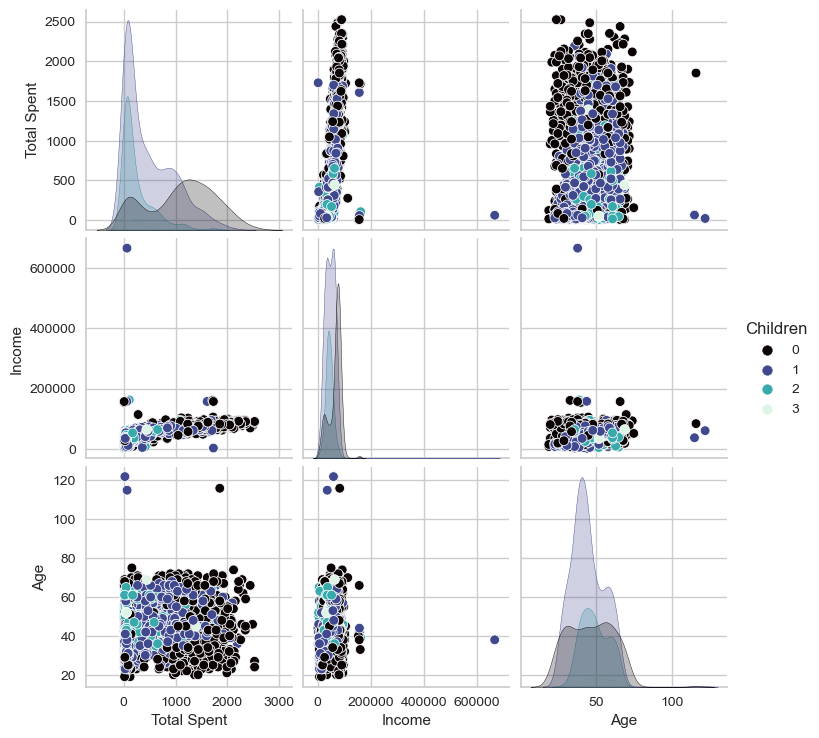

In [43]:
sns.pairplot(df , vars=['Total Spent','Income','Age'] , hue='Children', palette="mako")

<AxesSubplot:xlabel='Total Spent', ylabel='Income'>

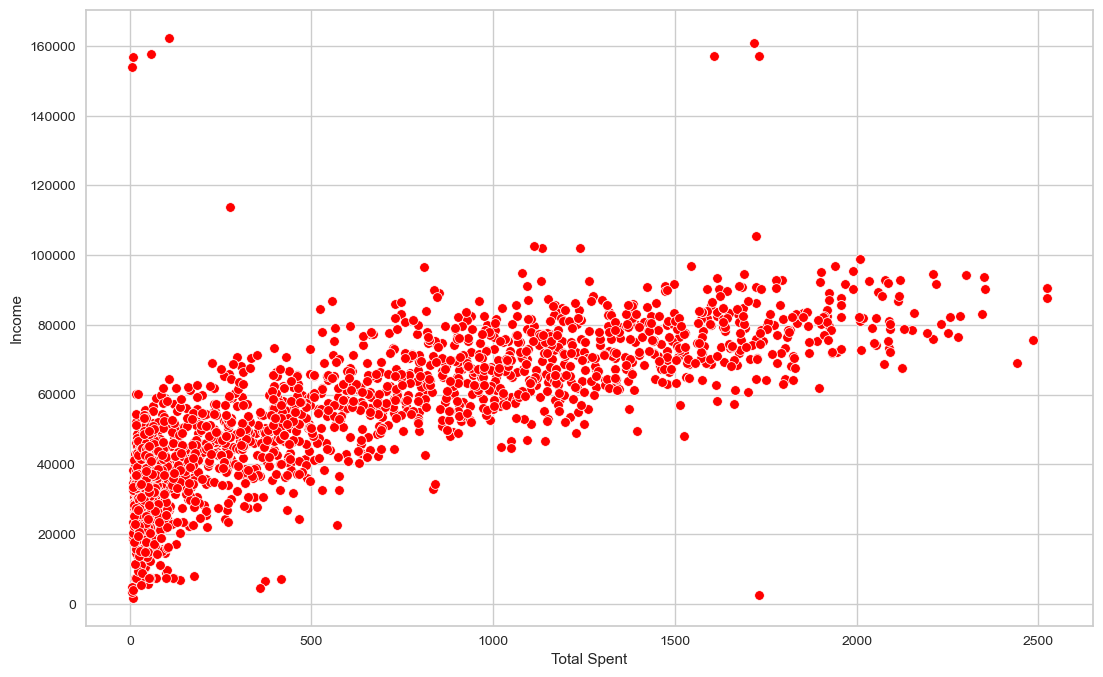

In [44]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df[df['Income']<600000]['Total Spent'], y=df[df['Income']<600000]['Income'], color='red')

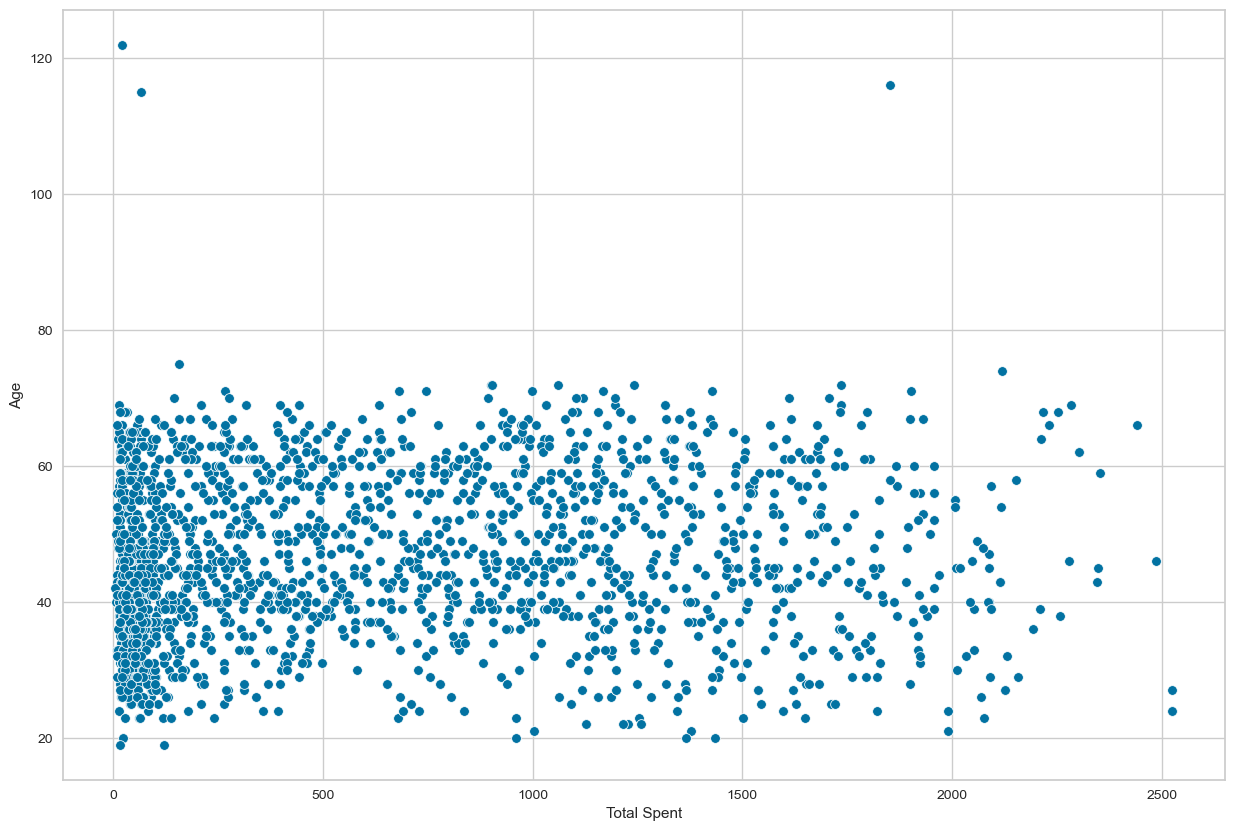

In [45]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Total Spent'], y=df['Age'])
plt.show()

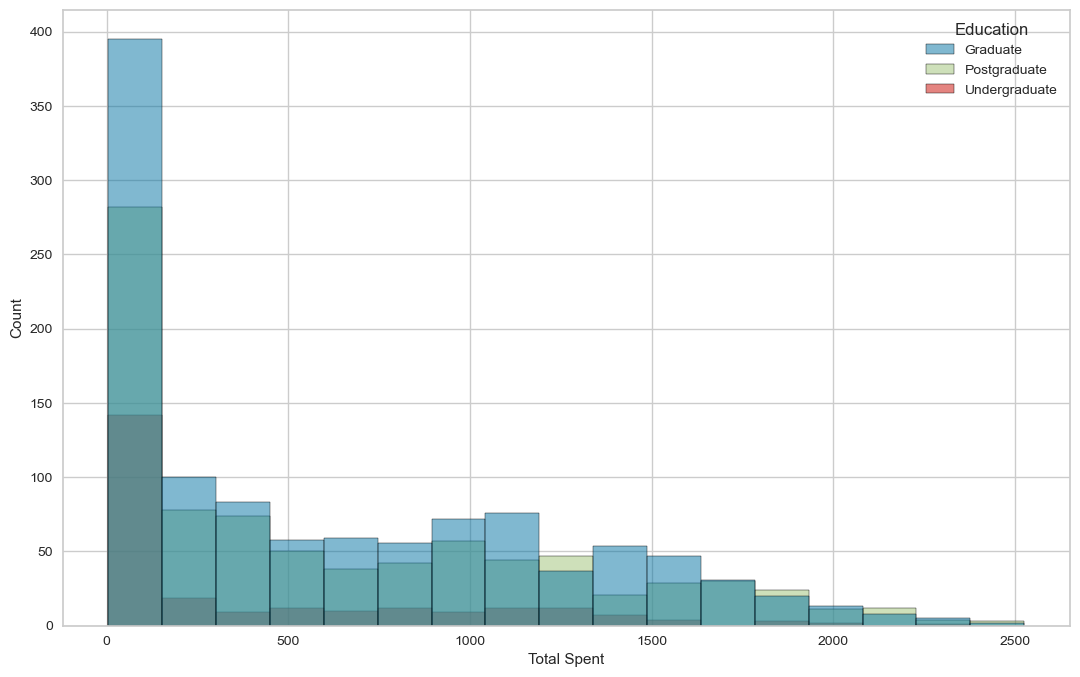

In [46]:
plt.figure(figsize=(13,8))
sns.histplot(x=df['Total Spent'], hue=df['Education'])
plt.show()

<AxesSubplot:ylabel='Education'>

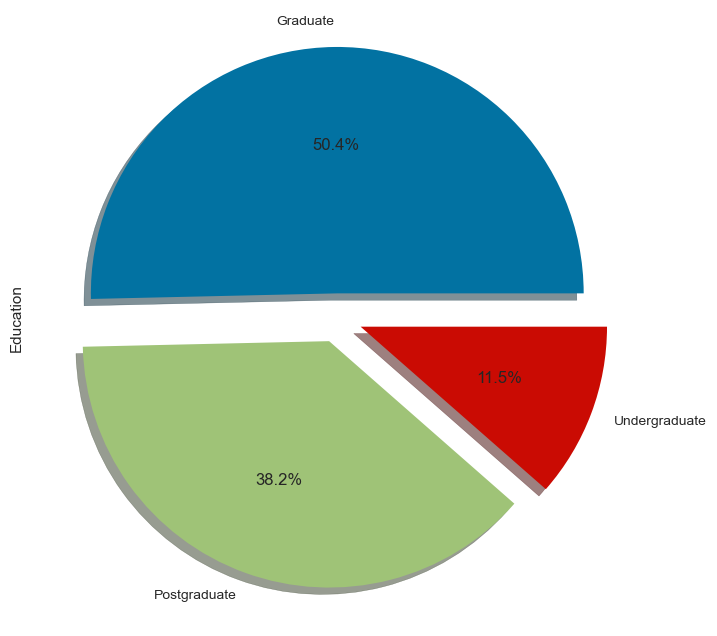

In [47]:
df['Education'].value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(8,8))

In [48]:
df["Education"].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

## Outlier Detection

Skewness :  6.763
Skewness :  0.636
Skewness :  0.408
Skewness :  0.002


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

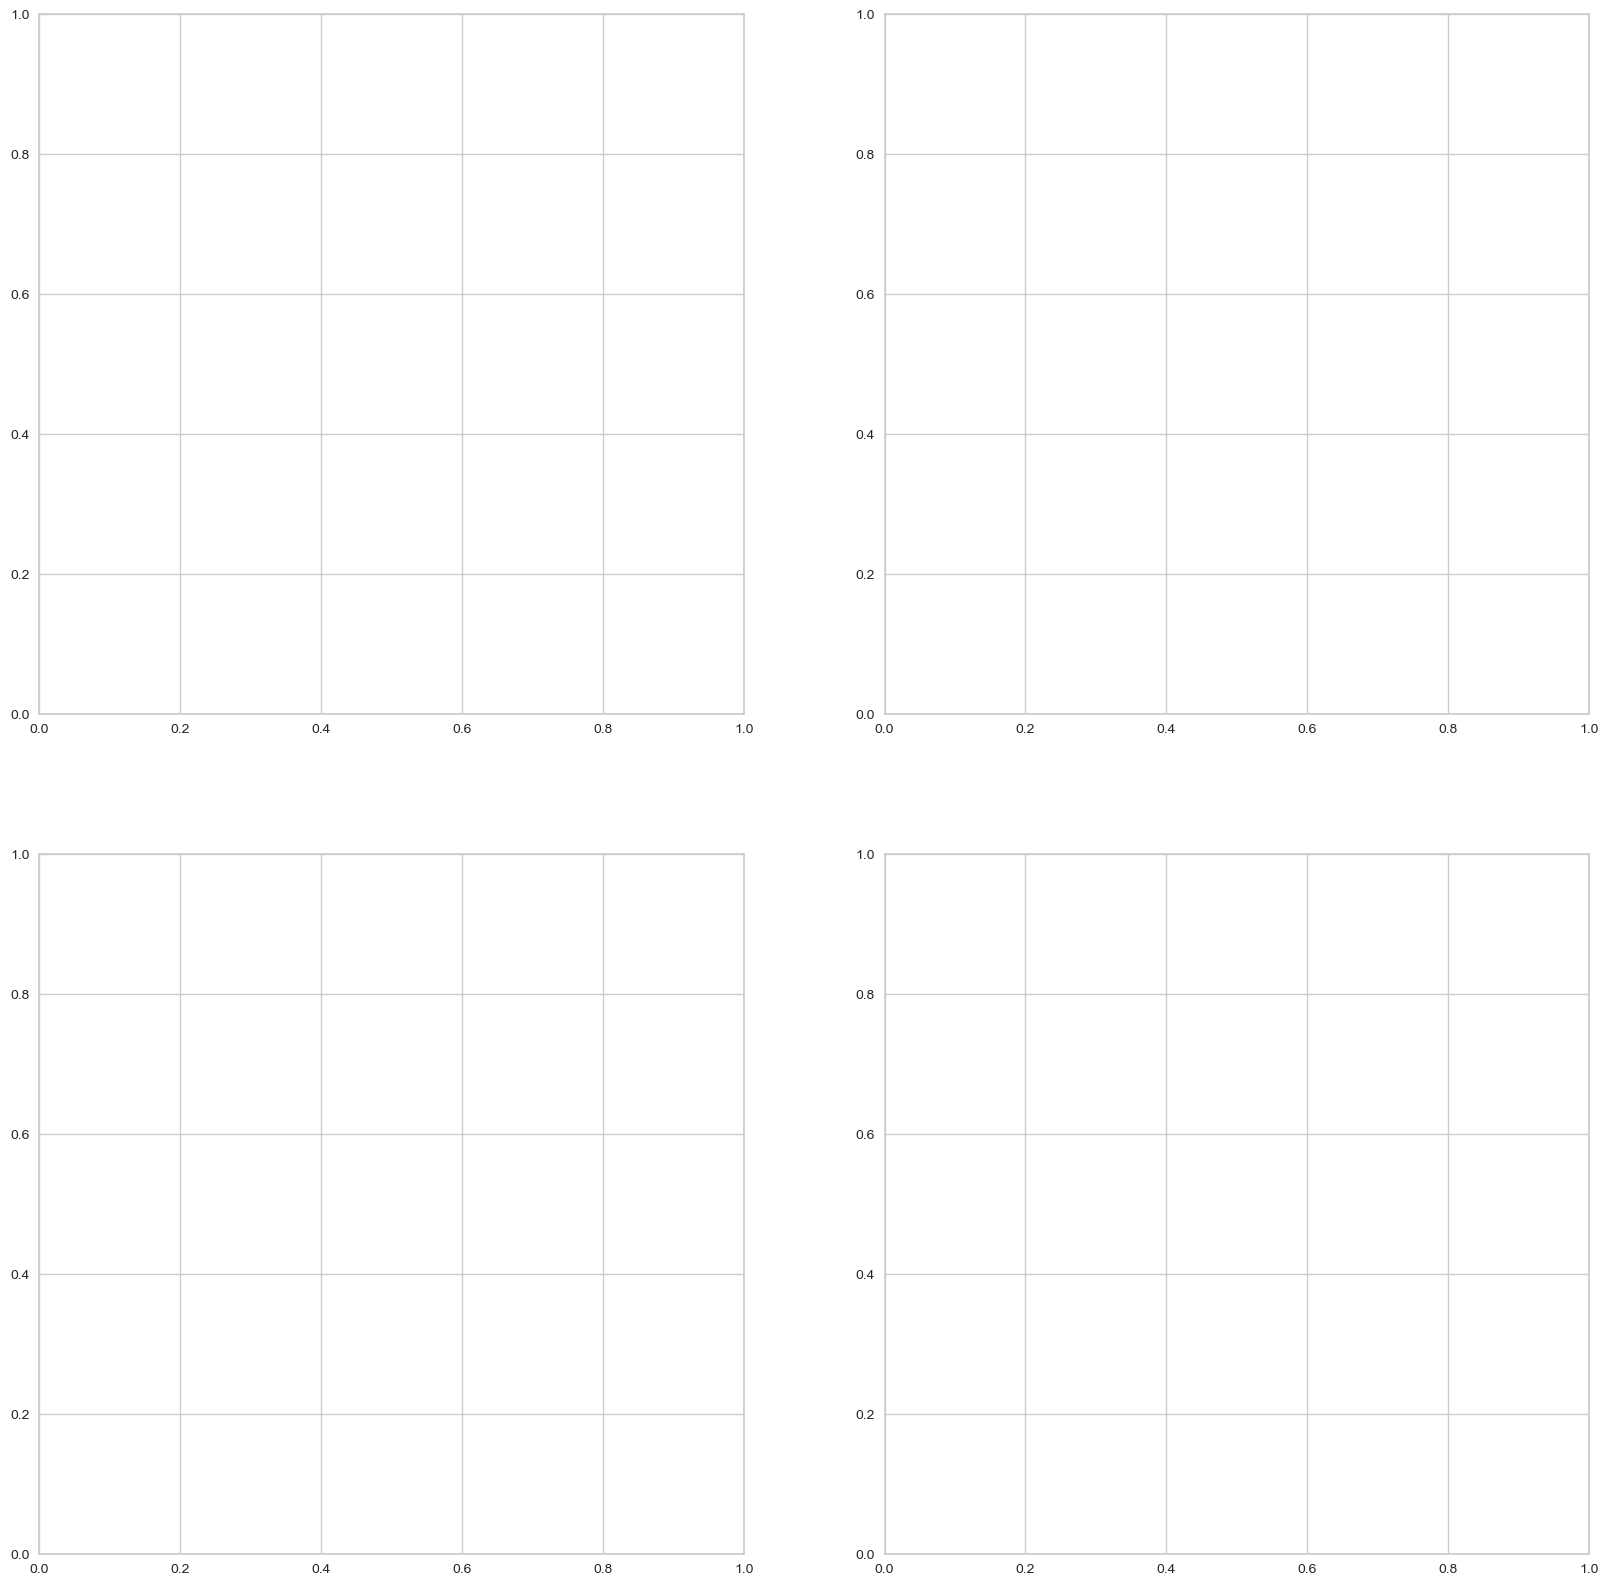

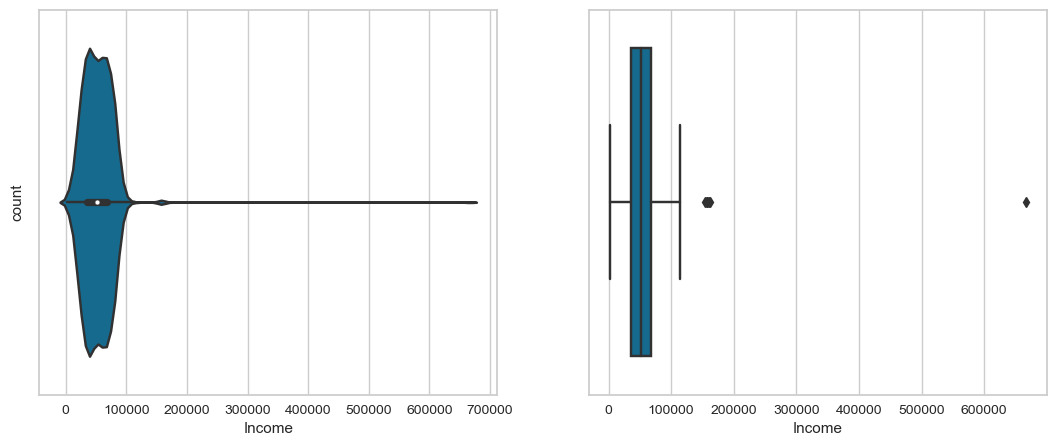

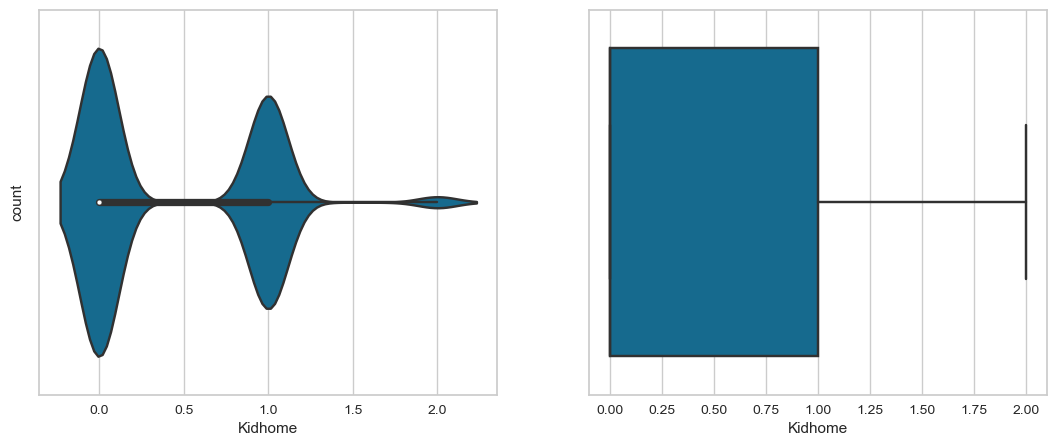

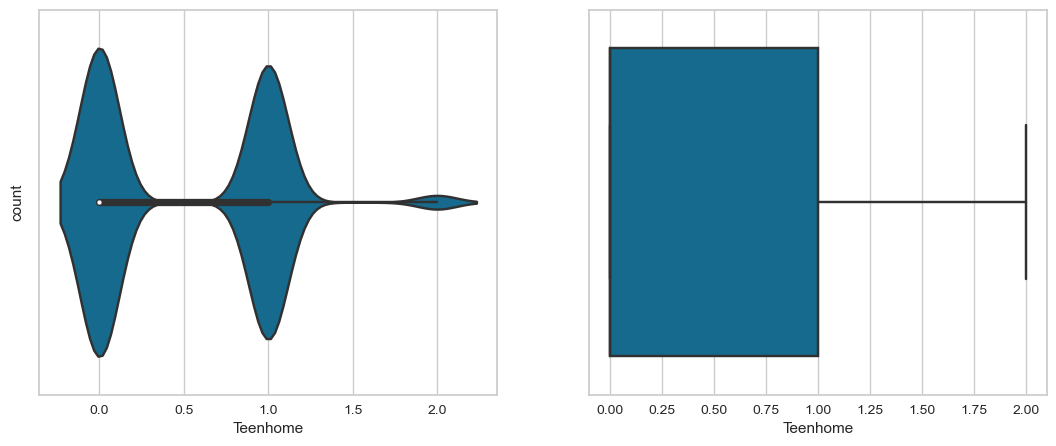

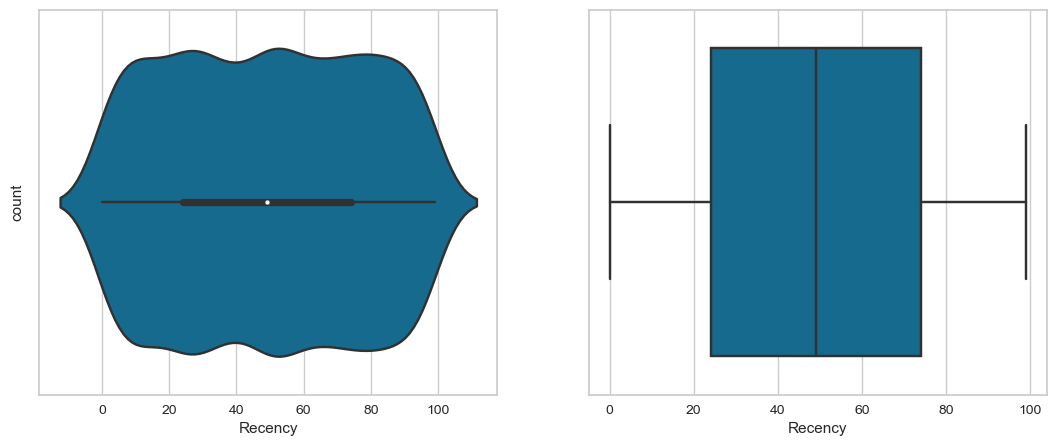

In [49]:
corr=df.corr()
fig, axes = plt.subplots(2,2, figsize=(20, 20))
for i, j in zip(corr[:29], axes.flatten()):
    print("Skewness : ", round(df[i].skew(),3))
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    sns.violinplot(df[i])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [51]:
ot=df[['Total Spent','Income','Age']] # Finding Outliers of These Three as these are the main features

Total Spent
Skewness :  0.858


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


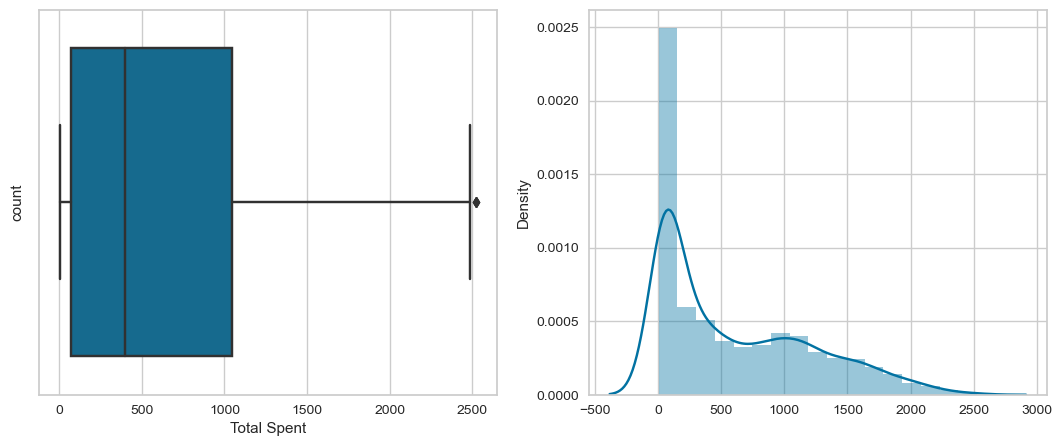

Income
Skewness :  6.763


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


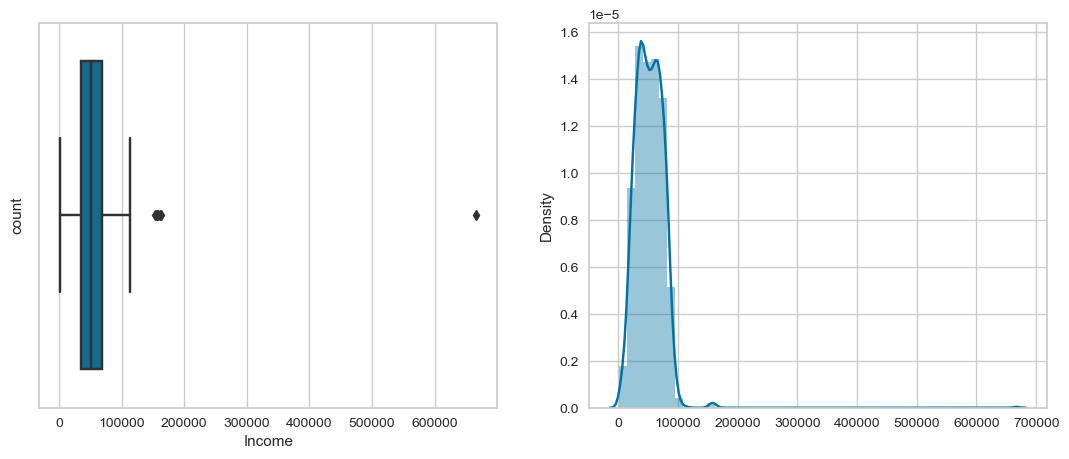

Age
Skewness :  0.354


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


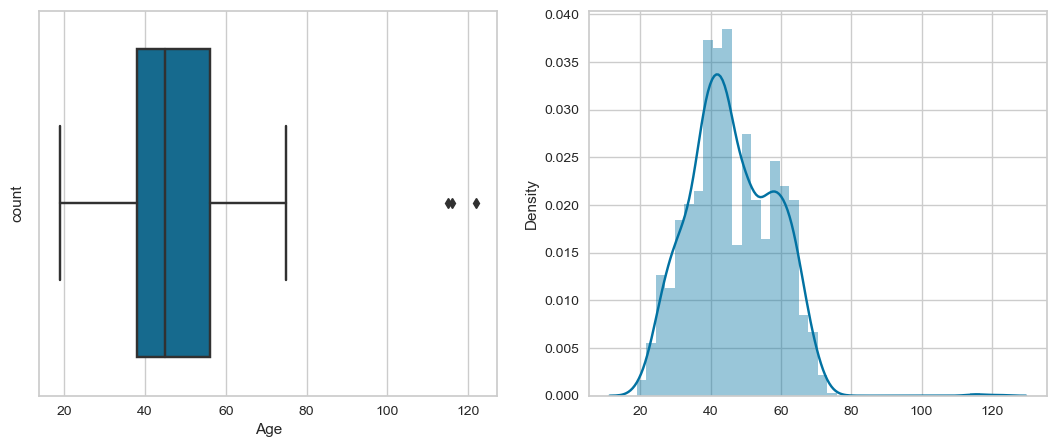

In [52]:
# Lets check outliers 

for i in ot:
    print(i)
    print("Skewness : ", round(df[i].skew(),3))
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.distplot(x=df[i])
    plt.show()    

Treatment of Outliers

In [53]:
def detect_outliers(s):
      for i in s:
        Q3, Q1 = np.percentile(df[i], [75 ,25])
        IQR = Q3 - Q1

        ul = Q3+1.5*IQR
        ll = Q1-1.5*IQR

        outliers = df[i][(df[i] > ul) | (df[i] < ll)]
        print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [54]:
detect_outliers(ot) 

*** Total Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Total Spent, dtype: int64 

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 



In [55]:
df= df[(df['Age']<100)]  # Treatment of Outlier Points in "Age"

In [56]:
df=df[(df["Income"]<600000)] # As in Income Box Plot Max Thresshold is Shown is 600000 

In [57]:
# As in Total Spent Box Plot Max Thresshold is Shown is 2500 we are not treating considering as it can be enhance for certain period of time

# Checking Data Shape

In [58]:
df.shape

(2212, 29)

In [59]:
df.size

64148

Lets Redefine Categorical Values

In [60]:
cat = [var for var in df.columns if df[var].dtype=='O']

In [61]:
# check the number of different labels
for var in cat:
    print(df[var].value_counts() / np.float(len(df)))
    print()
    print()

Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: Education, dtype: float64


Partner    0.64557
Alone      0.35443
Name: Living_With, dtype: float64




C:\Users\Admin\AppData\Local\Temp\ipykernel_7068\2310594379.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts() / np.float(len(df)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_7068\2310594379.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts() / np.float(len(df)))


# One Hot Encoding

In [62]:
list(np.unique(cat))

['Education', 'Living_With']

In [63]:
df['Living_With'].unique()  # Encoding of Living_With Column

array(['Alone', 'Partner'], dtype=object)

In [64]:
df['Living_With'] = df['Living_With'].map({'Alone':0,'Partner':1}) # Replacing the Value

In [65]:
df['Education'].unique()  # Encoding of Education Column

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [66]:
df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2}) # Replacing the Valie

Checking Data Type

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

As Living_With and Education has been Converted Lets Check Head

In [68]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          1  58138.0        0         0       58       635         88   
1          1  46344.0        1         1       38        11          1   
2          1  71613.0        0         0       26       426         49   
3          1  26646.0        1         0       26        11          4   
4          2  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Response  Age  Total Spent  Living_With  Children  \
0             0         0         1   58         1617            0         0   
1             0         0         0   61           27            0         2   
2             0         0         0   50          776            1         0   
3             0         0         0   31           53            1         1   
4             0         0         0   34          422            1         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1  

[5 rows x 29 columns]

# Droping Highly Correlated Features/Columns

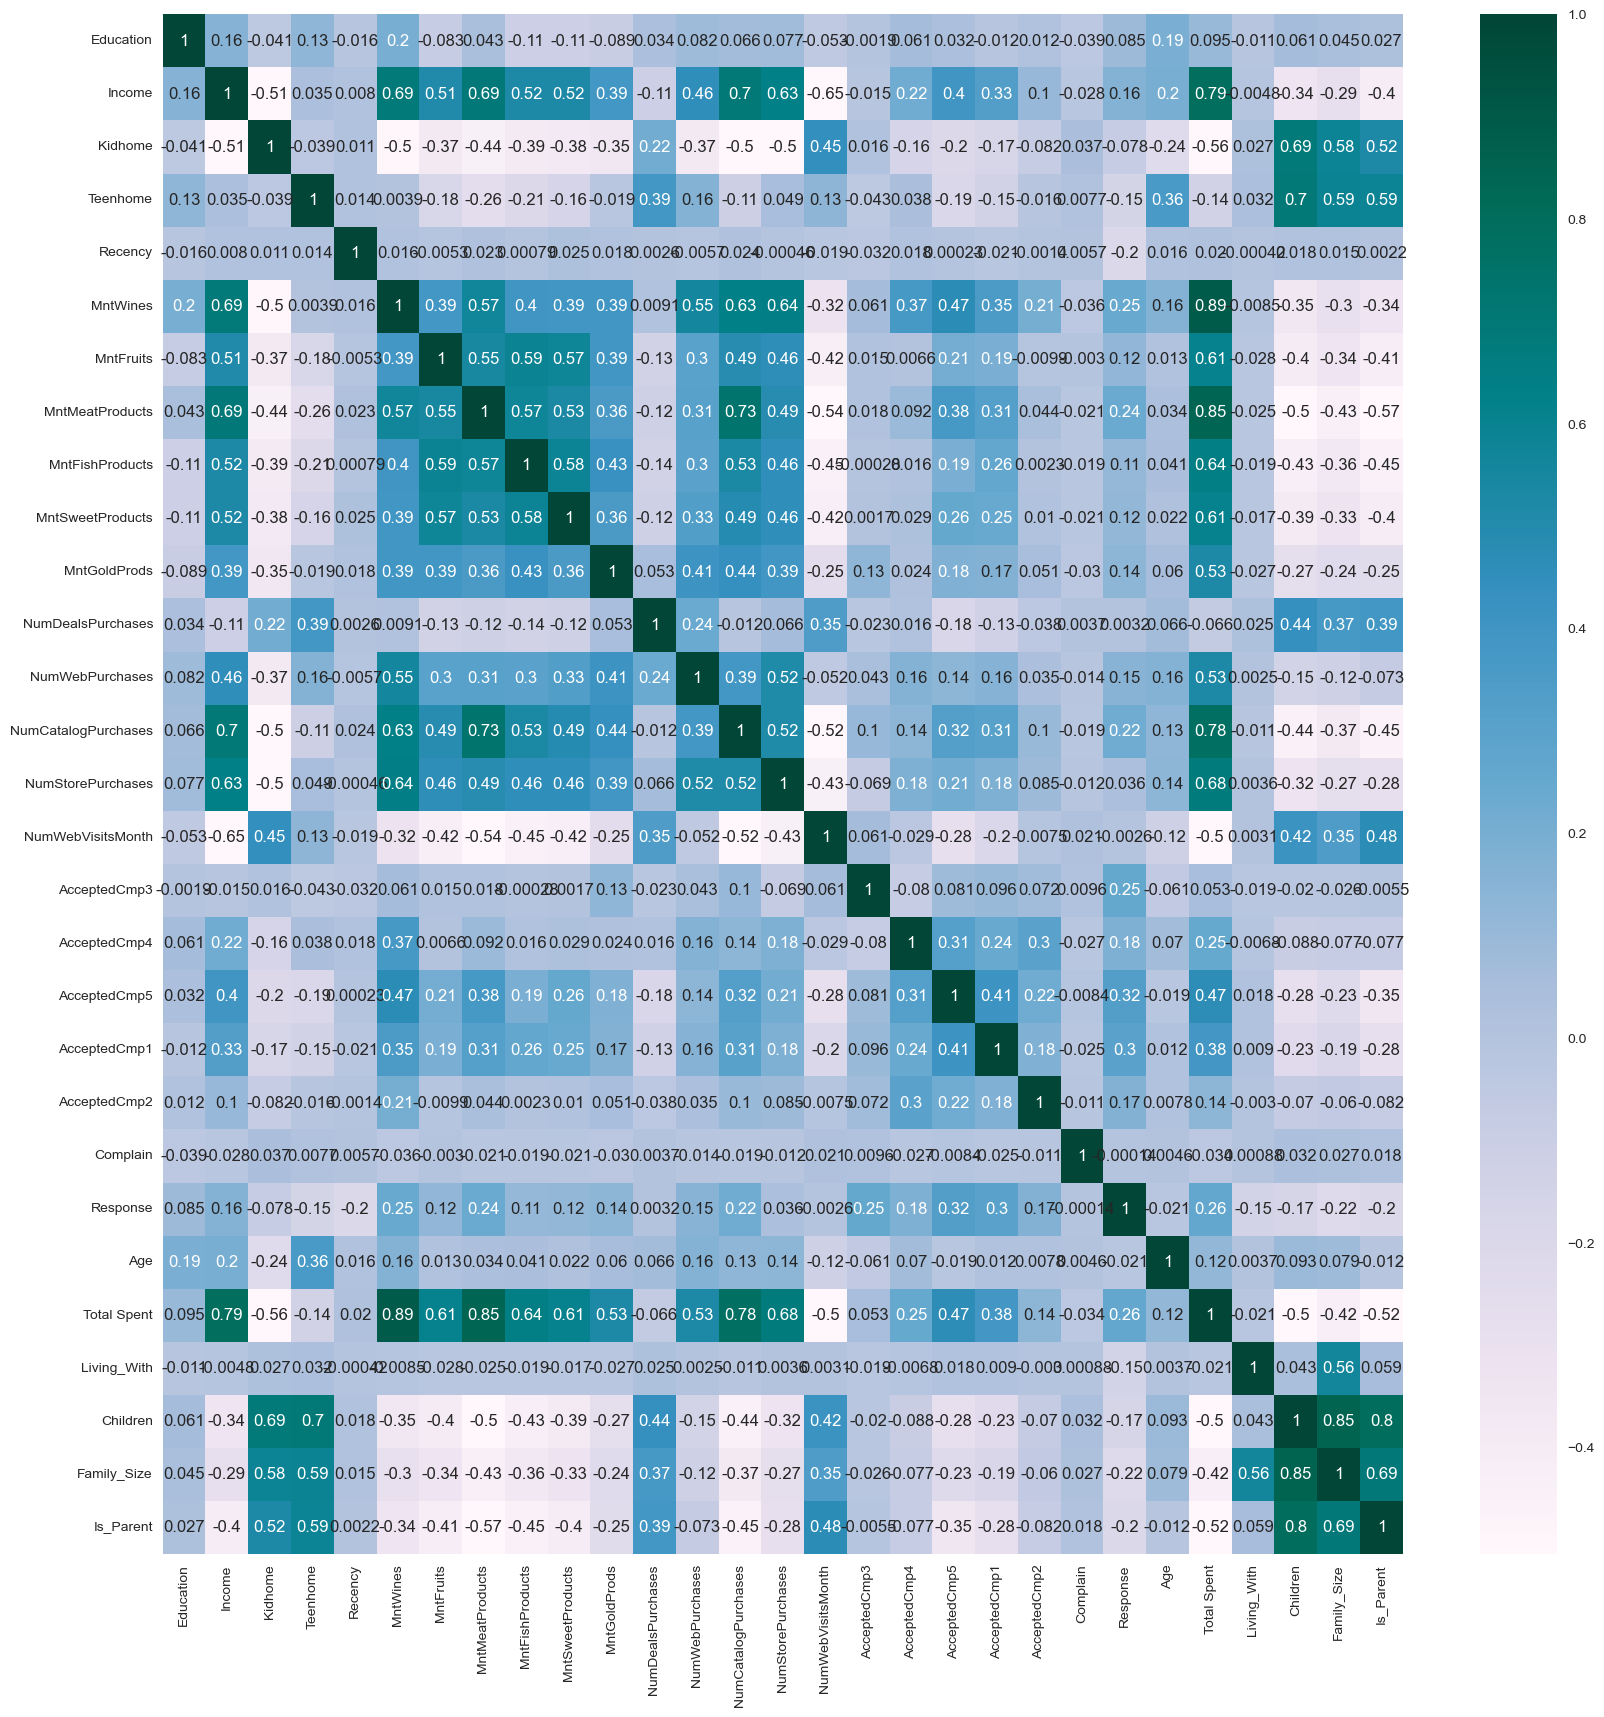

In [69]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=df.corr(), annot=True,robust=True,cmap="PuBuGn",)
plt.show()

## Numeric Features Scaling

In [70]:
df_old = df.copy()

In [71]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cd = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cd, axis=1)

In [72]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

Lets Check The Data

In [73]:
df.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.411675 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   1.123949  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebPurchases  \
0         1.690293         2.453472          1.483713  ...         1.426865   
1        -0.718230        -0.651004         -0.634019  ...        -1.126420   
2        -0.178542         1.339513         -0.147184  ...         1.426865   
3        -0.655787        -0.504911         -0.585335  ...        -0.761665   
4        -0.218684         0.152508         -0.001133  ...         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.503607          -0.555814           0.692181  1.018352   
1            -0.571340          -1.171160          -0.132545  1.274785   
2            -0.229679           1.290224          -0.544908  0.334530   
3            -0.913000          -0.555814           0.279818 -1.289547   
4             0.111982           0.059532          -0.132545 -1.033114   

   Total Spent  Living_With  Children  Family_Size  Is_Parent  
0     1.676245    -1.349603 -1.264598    -1.758359  -1.581139  
1    -0.963297    -1.349603  1.404572     0.449070   0.632456  
2     0.280110     0.740959 -1.264598    -0.654644  -1.581139  
3    -0.920135     0.740959  0.069987     0.449070   0.632456  
4    -0.307562     0.740959  0.069987     0.449070   0.632456  

[5 rows x 22 columns]

As You Can Check Scalling Has Already Been Done

#  Unsupervised ML - PCA Introduction to Data

In [74]:
pca= PCA(n_components=3,whiten=True,random_state=True) # this will reduce data shape 
pca.fit(df)

PCA(n_components=3, random_state=True, whiten=True)

In [75]:
s = pca.components_.T
s

array([[ 1.13472901e-02,  1.40723642e-01, -5.06902727e-01],
       [ 2.79487082e-01,  1.78237211e-01, -7.51900020e-02],
       [-2.46222707e-01,  5.22617827e-03,  2.83183588e-01],
       [-9.87088420e-02,  4.62105928e-01, -1.51900827e-01],
       [ 3.52657322e-03,  1.62574053e-02,  3.59365897e-02],
       [ 2.55717084e-01,  2.09378765e-01, -1.16976267e-01],
       [ 2.38397784e-01,  1.10555703e-02,  2.53641992e-01],
       [ 2.85462037e-01,  9.91938670e-03,  7.62986170e-02],
       [ 2.48709772e-01,  2.46088063e-04,  2.53737622e-01],
       [ 2.37301867e-01,  2.16356192e-02,  2.57943924e-01],
       [ 1.88380423e-01,  1.23085426e-01,  1.99661102e-01],
       [-7.82600927e-02,  3.48732296e-01,  1.52494708e-01],
       [ 1.67559785e-01,  2.96791515e-01,  2.33465415e-02],
       [ 2.77349147e-01,  1.05965422e-01,  1.67694624e-02],
       [ 2.41542895e-01,  2.05469309e-01, -7.19986262e-03],
       [-2.25949476e-01,  4.60999817e-02,  9.06560363e-02],
       [ 3.84647363e-02,  2.34781595e-01

In [76]:
pd.DataFrame(s, index=df.columns, columns=['Col 1','Col 2','Col 3'])

Col 1     Col 2     Col 3
Education            0.011347  0.140724 -0.506903
Income               0.279487  0.178237 -0.075190
Kidhome             -0.246223  0.005226  0.283184
Teenhome            -0.098709  0.462106 -0.151901
Recency              0.003527  0.016257  0.035937
MntWines             0.255717  0.209379 -0.116976
MntFruits            0.238398  0.011056  0.253642
MntMeatProducts      0.285462  0.009919  0.076299
MntFishProducts      0.248710  0.000246  0.253738
MntSweetProducts     0.237302  0.021636  0.257944
MntGoldProds         0.188380  0.123085  0.199661
NumDealsPurchases   -0.078260  0.348732  0.152495
NumWebPurchases      0.167560  0.296792  0.023347
NumCatalogPurchases  0.277349  0.105965  0.016769
NumStorePurchases    0.241543  0.205469 -0.007200
NumWebVisitsMonth   -0.225949  0.046100  0.090656
Age                  0.038465  0.234782 -0.428572
Total Spent          0.320099  0.133705  0.037432
Living_With         -0.027576  0.125509  0.300374
Children            -0.248087  0.339320  0.092578
Family_Size         -0.219730  0.346883  0.235146
Is_Parent           -0.242808  0.292280  0.081861

In [77]:
pca.explained_variance_

array([8.27465625, 2.9209145 , 1.43060382])

In [78]:
pca.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499805])

In [79]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.375951
2               0.132709
3               0.064998

In [80]:
pca.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365757])

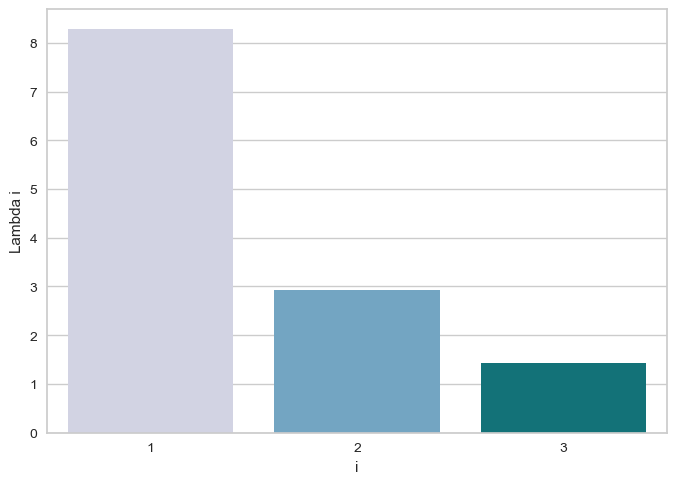

In [81]:
sns.barplot(x = list(range(1,4)), y = pca.explained_variance_, palette = 'PuBuGn')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [82]:
df_PCA = pd.DataFrame(pca.transform(df), columns=(['col1', 'col2', 'col3']))

In [83]:
df_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -5.320237e-17  1.000000 -2.056279 -0.885790 -0.272871  0.840777   
col2  2212.0  4.788213e-17  1.000000 -2.573599 -0.786058 -0.078007  0.727332   
col3  2212.0 -1.550899e-17  1.000001 -2.961368 -0.722970 -0.012753  0.688907   

           max  
col1  2.586812  
col2  3.655899  
col3  4.211296

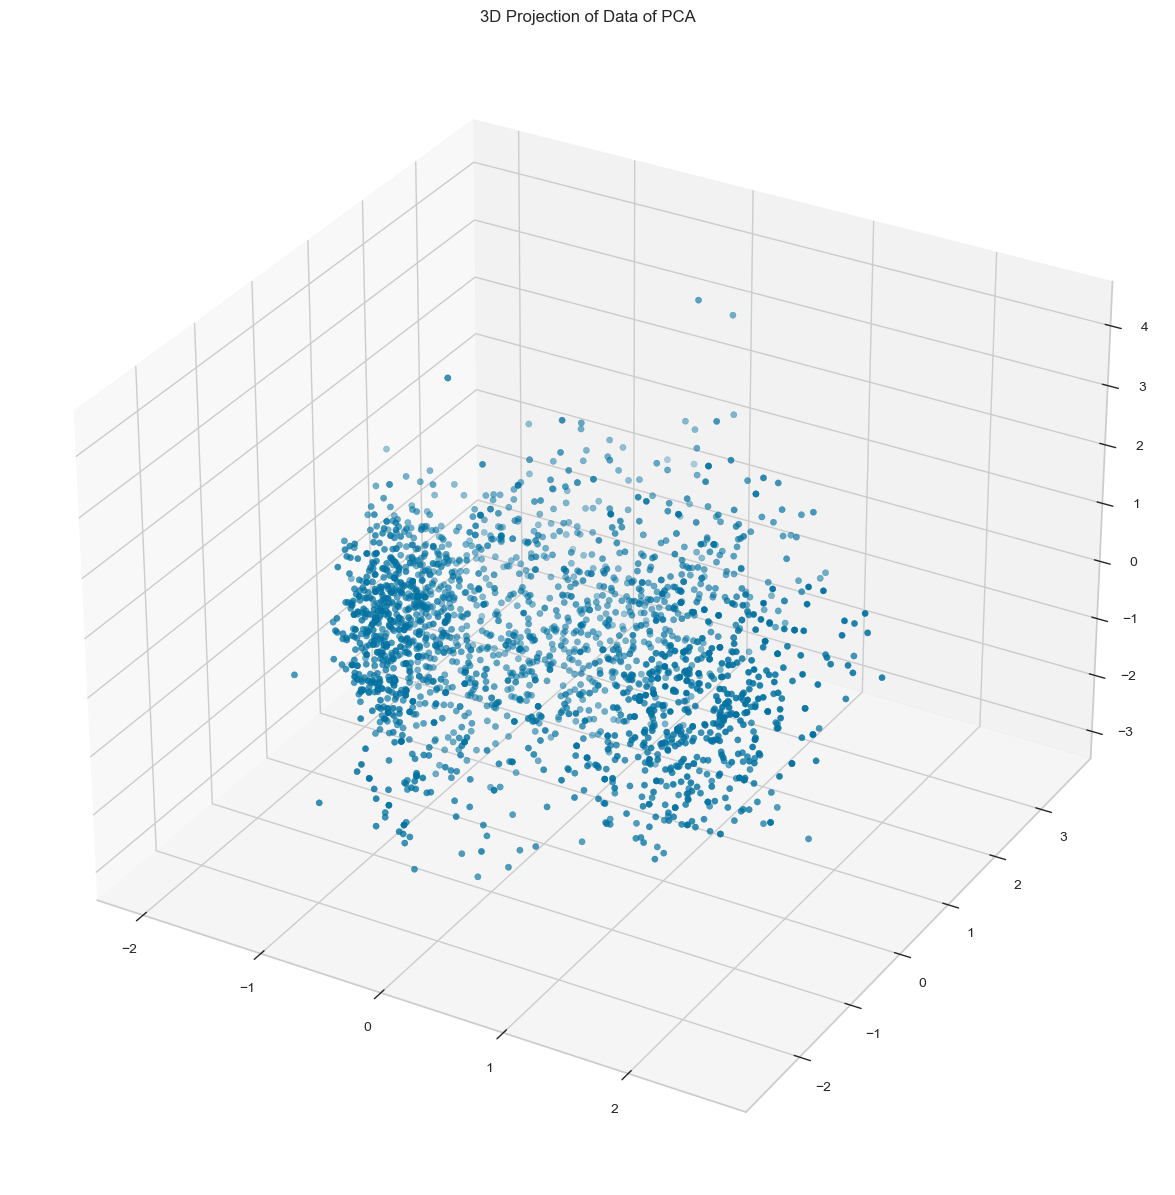

In [84]:
x = df_PCA['col1']
y = df_PCA['col2']
z = df_PCA['col3']

fig = plt.figure(figsize=(15,15))
a = fig.add_subplot(111, projection='3d')
a.scatter(x,y,z,  marker='o',depthshade=True)
a.set_title('3D Projection of Data of PCA')
plt.show()

# Clustering

Using Elbow Methord To Determine Number of Cluster Needed for this Data

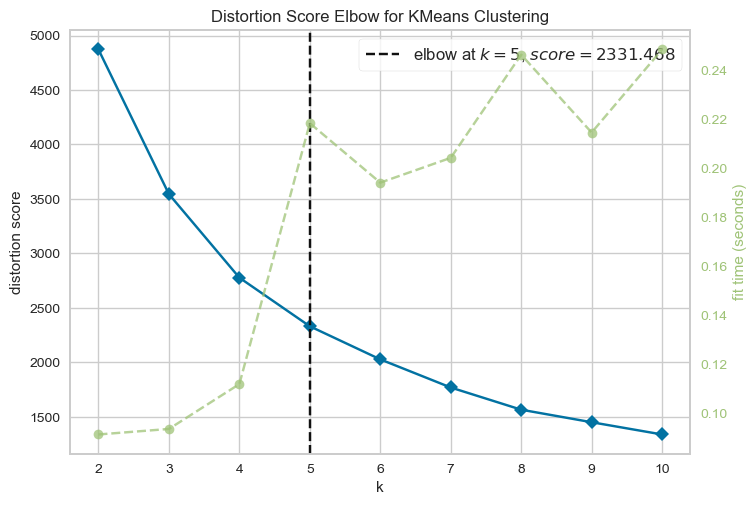

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(df_PCA)
Elbow.show()

In [86]:
AC = AgglomerativeClustering(n_clusters=4,affinity='euclidean')
# fit model and predict clusters
y_AC = AC.fit_predict(df_PCA)
df_PCA['Clusters'] = y_AC
#Adding the Clusters feature to the orignal dataframe.
df['Clusters'] = y_AC
df_old['Clusters'] = y_AC

In [87]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score for clusters
score = silhouette_score(df_PCA, y_AC)

score

0.42765610683354

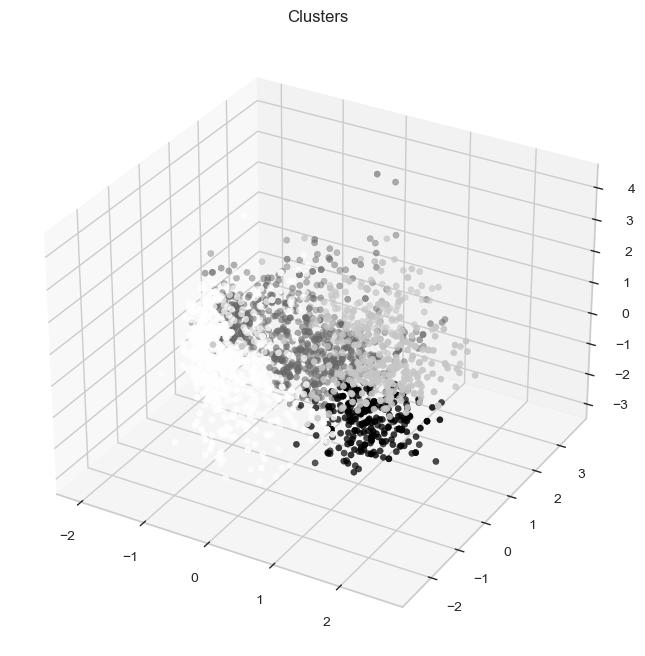

In [88]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, c=df_PCA['Clusters'])
ax.set_title('Clusters')
plt.show()

# Checking Clusters Formed

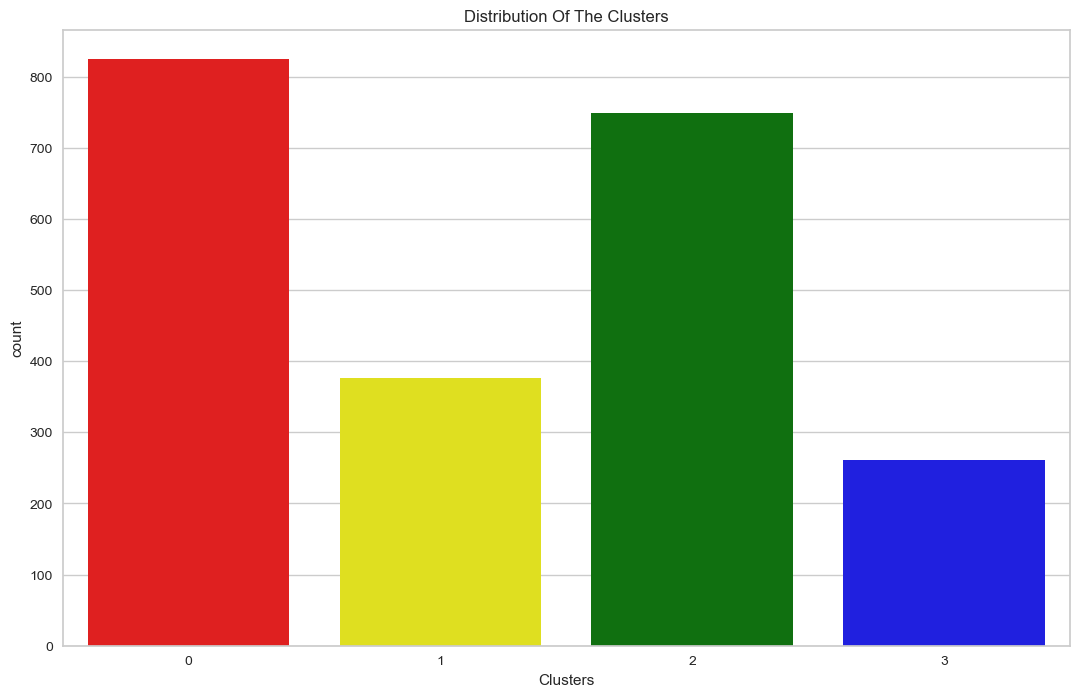

In [89]:
colour = ['red','yellow', 'green','blue']
plt.figure(figsize=(13,8))
ccf=sns.countplot(x=df['Clusters'], palette= colour)
ccf.set_title('Distribution Of The Clusters')
plt.show()

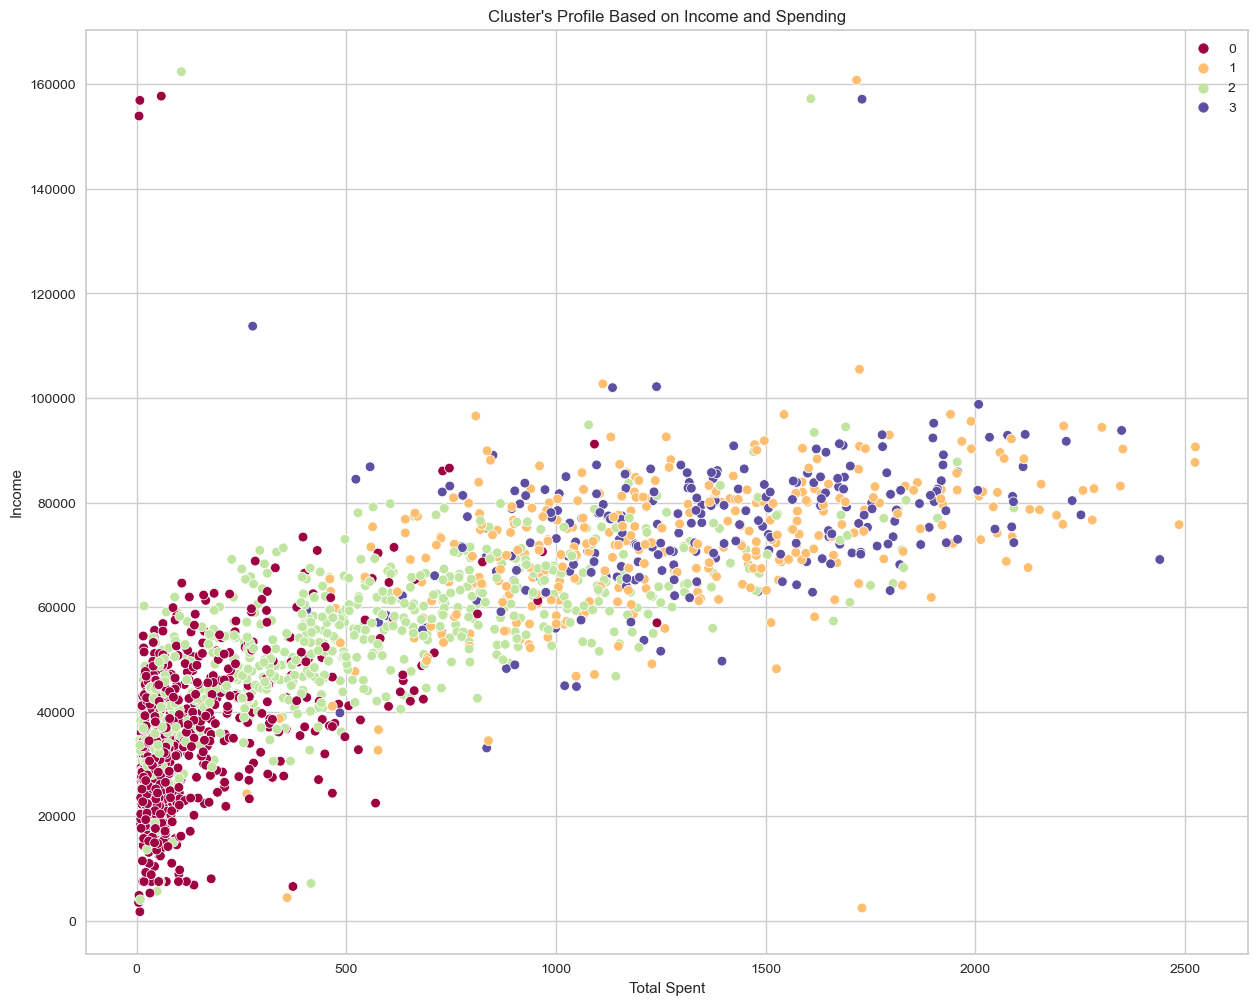

In [90]:
plt.figure(figsize=(15,12))
pl = sns.scatterplot(data=df_old, x=df_old['Total Spent'], y=df_old['Income'], hue=df_old['Clusters'], palette="Spectral")
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

Income vs spending plot shows the clusters pattern


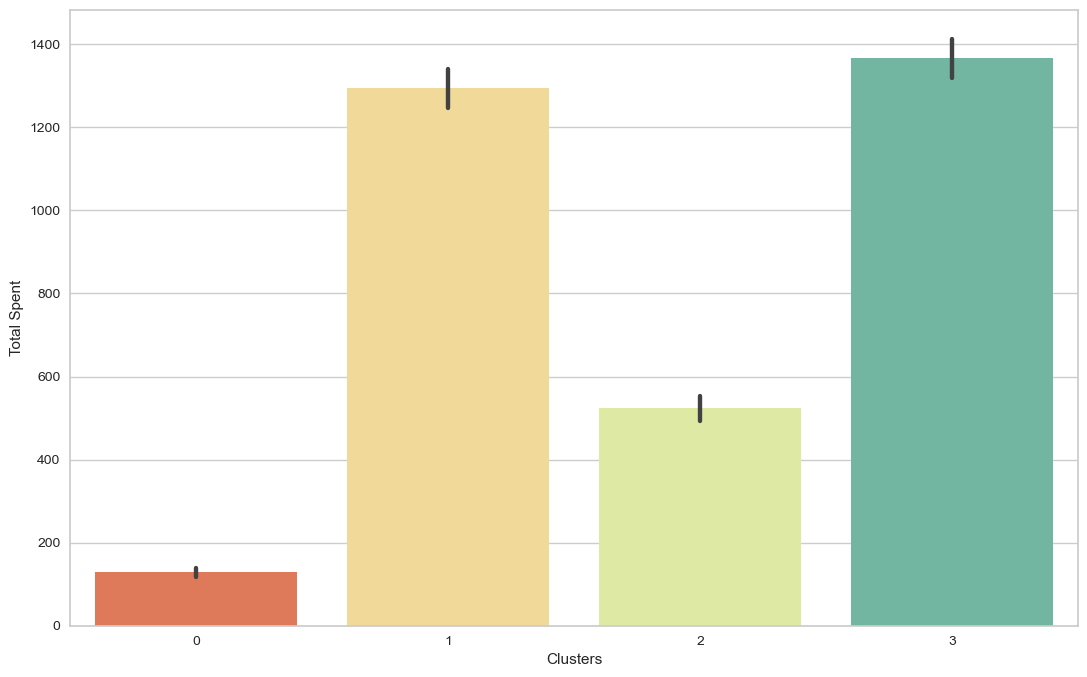

In [91]:
plt.figure(figsize=(13,8))
sns.barplot(x=df_old['Clusters'], y=df_old['Total Spent'], palette="Spectral")
plt.show();

As You Can See That

Cluster 1 Has Higher Spending

Cluster 0 Has Average Spending

Cluster 2 Has Low Spending

Cluster 3 Has Lowest Spending


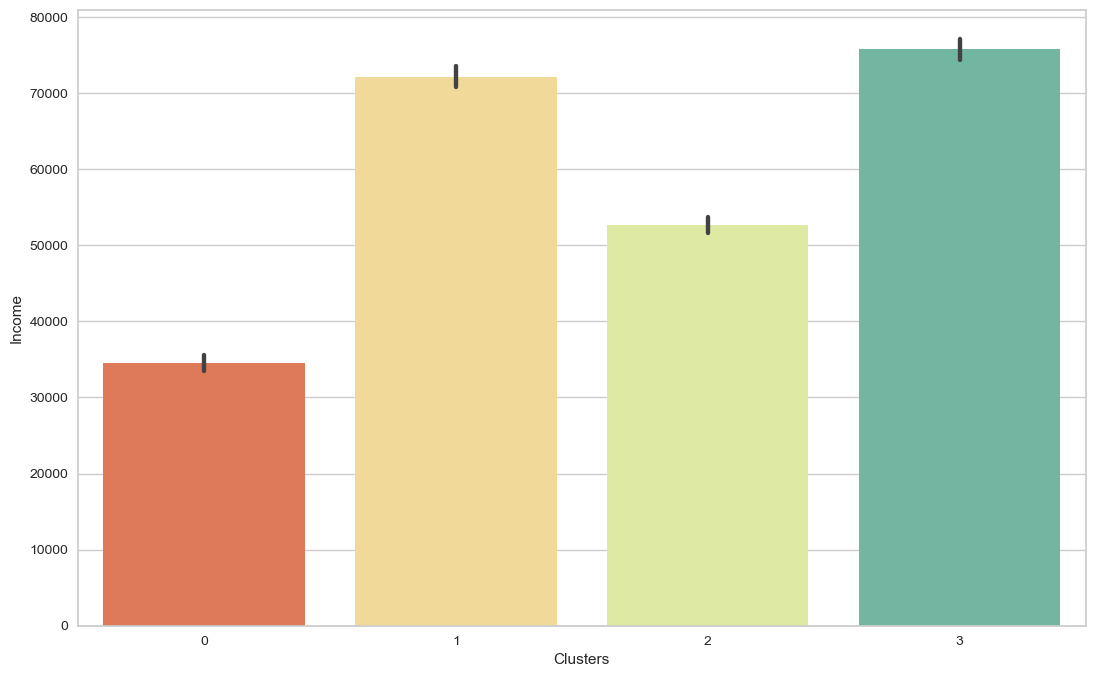

In [92]:
plt.figure(figsize=(13,8))
sns.barplot(x=df_old['Clusters'], y=df_old['Income'], palette="Spectral")
plt.show();

As You Can See That :

    Cluster 1 Has Highest Income
    
    Cluster 0 Has High Income 
    
    Cluster 2 Has Lowest Among All Income 
    
    Cluster 3 Has Low Income But Higher Than Cluster 2

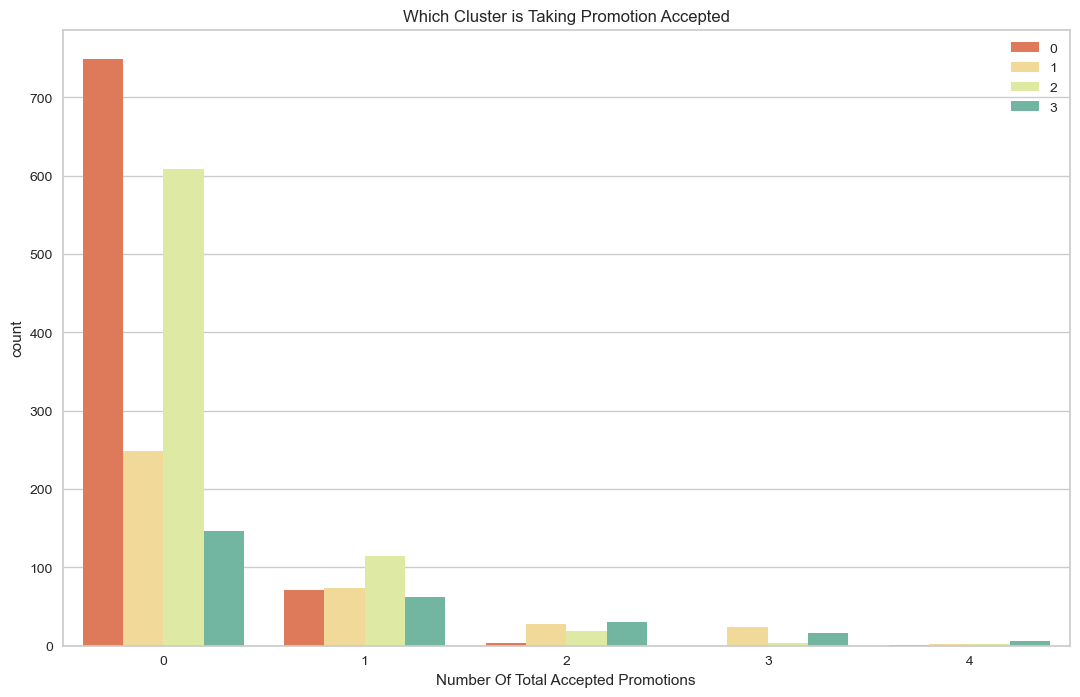

In [93]:
df_old['Total_Promos'] = df_old['AcceptedCmp1']+ df_old['AcceptedCmp2']+ df_old['AcceptedCmp3']+ df_old['AcceptedCmp4']+ df_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
cp = sns.countplot(x=df_old['Total_Promos'], hue=df_old['Clusters'], palette= "Spectral")
cp.set_title('Which Cluster is Taking Promotion Accepted')
cp.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

As You Can See That:
    Cluster 0 Is Highest Promotion Accepter Whereas Cluster 4 Doesnt Even Care
    
Hence, There is No One Who is Taking Par in All 5 Promotion Acceptance. 

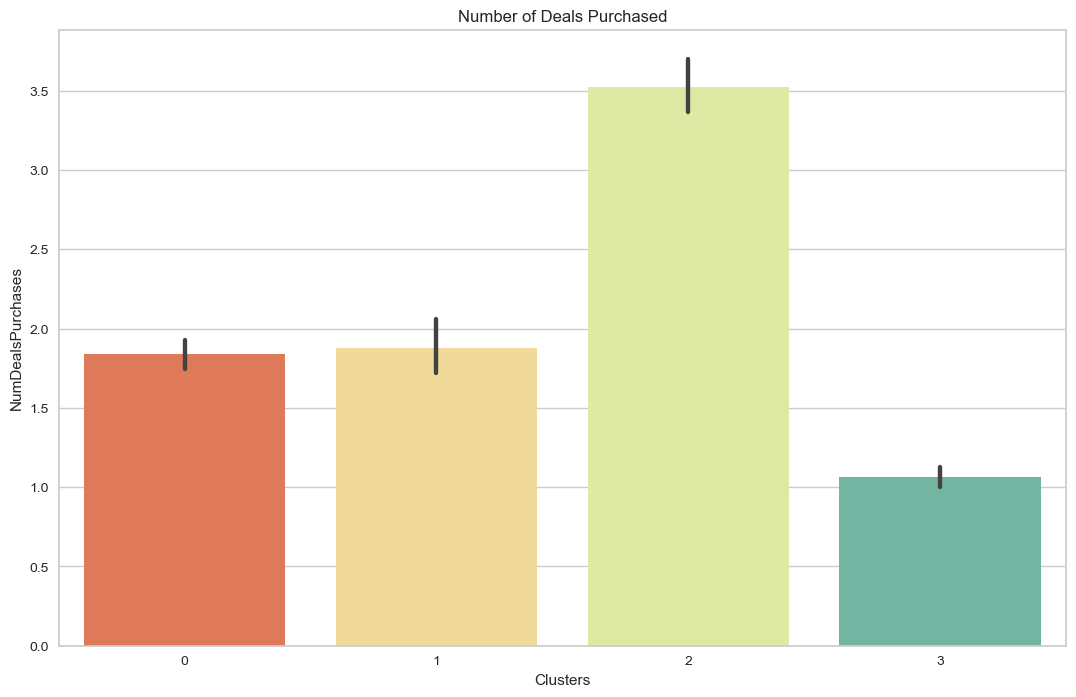

In [94]:
plt.figure(figsize=(13,8))
sns.barplot(y=df_old['NumDealsPurchases'],x=df_old['Clusters'], palette= "Spectral")
plt.title('Number of Deals Purchased');

As You Can See That:
    
    Cluster 0 Purchased Most Number of Deals
    
    Followed By Cluster 3
    
    Followed By Cluster 2
    
    Followed BY Cluster 1

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1300x800 with 0 Axes>

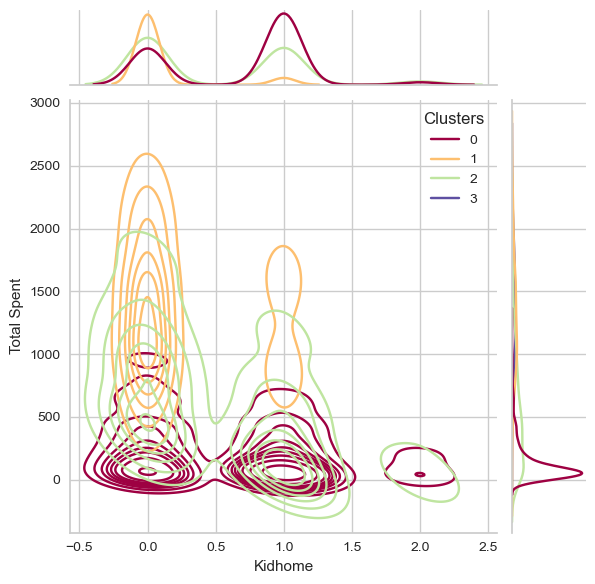

<Figure size 1300x800 with 0 Axes>

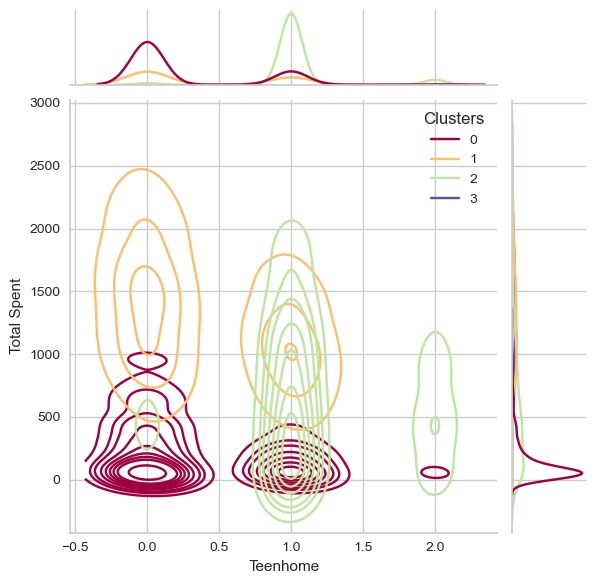

<Figure size 1300x800 with 0 Axes>

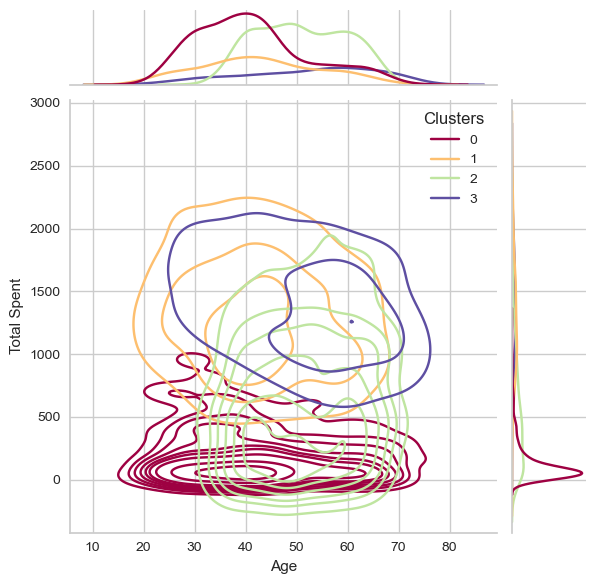

<Figure size 1300x800 with 0 Axes>

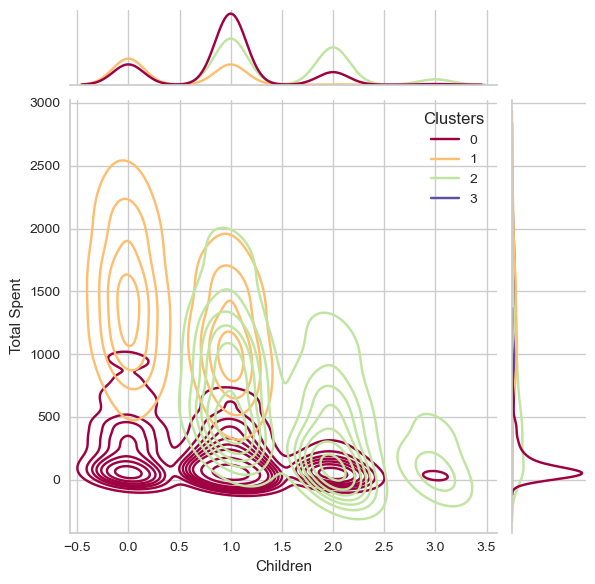

<Figure size 1300x800 with 0 Axes>

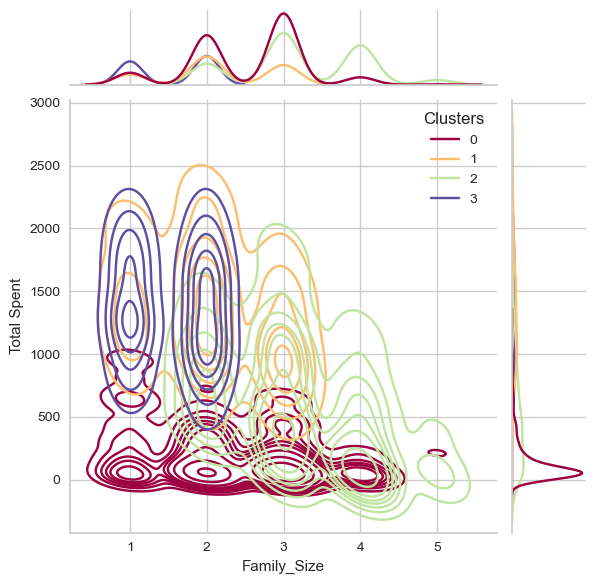

<Figure size 1300x800 with 0 Axes>

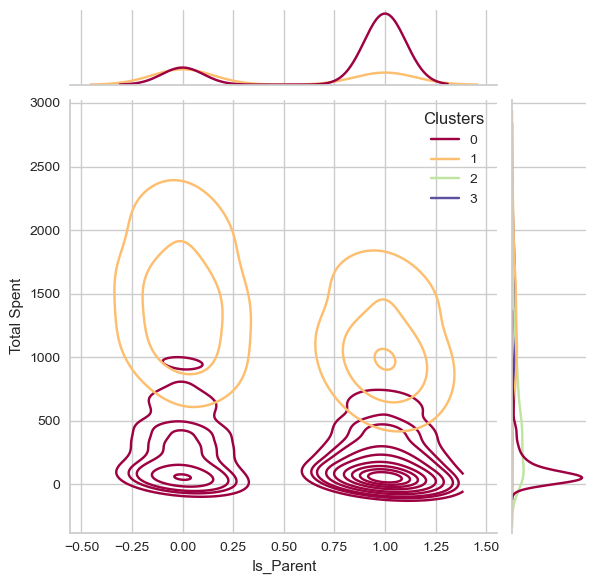

<Figure size 1300x800 with 0 Axes>

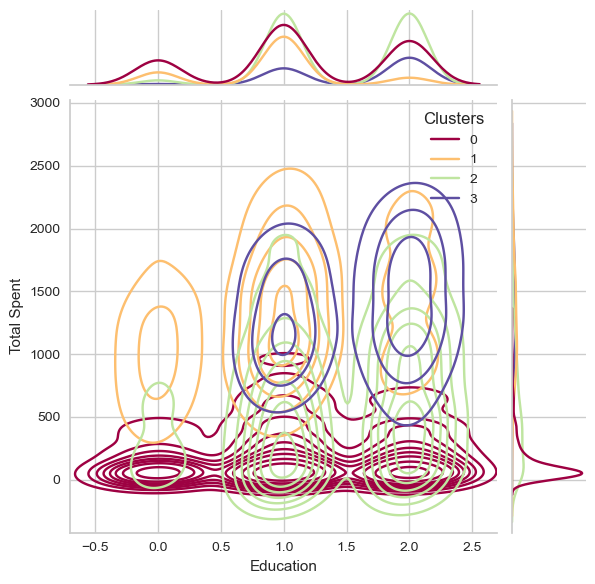

<Figure size 1300x800 with 0 Axes>

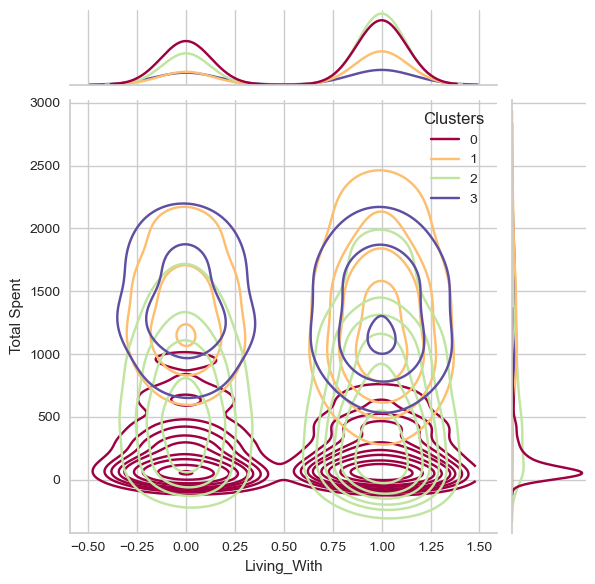

In [95]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=df_old[i], y=df_old['Total Spent'], hue=df_old['Clusters'], kind='kde', palette="Spectral");

About Cluster 1:

1. Definitely not having Childred a parent

2. At max are only 2 members in the family.

3. A slight majority of couples over single people

4. Majority are Highly Educated

5. Span all ages from 20 to below 80

6. high income and high spending

About Cluster 3:

1. Definitely a parent
2. At max have 5 members in the family and at least 2
3. Majority of them have a teenager at home
4. Relatively older

About Cluster 2:

1. The majority of these people are parents
2. At max have 3 members in the family
3. They majorly have one kid and typically not tennagers
4. Relatively younger

Cluster 0

1. Definitely a parent
2. At max have 4 members in the family and at least 2
3. Most have a teeanger in home
4. Single parents are a subset of this group
5. Relatively older